In [ ]:
# get rid of some chemprop warnings
# import warnings

# warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import os

import pandas as pd

# load the data
df = pd.read_csv('/home/s2861704/ppk/test_kin/prep_storage/K200_TK.csv')

display(df.head())

In [ ]:
# pivot the dataframe to have the accession as columns
df = df.pivot(index="SMILES", columns="accession", values="pchembl_value_Mean")
#df.columns.name = None
df.reset_index(inplace=True)
print(df.columns)

display(df.head())
#Teams message + delete smiles

In [ ]:
# print(len(df))
# max_Nans = len(df) - 30
# print(max_Nans)

In [ ]:
# df_noempty = df
# df_noempty = df_noempty.drop(list(df.columns[df.isna().sum() > max_Nans]), axis=1)
# df = df_noempty.copy()
# display(df)

In [ ]:
column_list = list(df.columns)
print (column_list)

In [ ]:
del column_list[0:1]
print(column_list)

In [ ]:
from qsprpred.data import QSPRDataset
from sklearn.impute import SimpleImputer

target_props = []
for target in column_list:
    target_props.append({'name': target, 'task': "REGRESSION"})

In [ ]:
print(target_props)

In [ ]:
targets_kinase200 = df.columns[1:57].tolist()
display(targets_kinase200)

In [ ]:
from qsprpred.data import QSPRDataset, RandomSplit
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data.descriptors.sets import SmilesDesc
from qsprpred.data.sampling.splits import GBMTRandomSplit, GBMTDataSplit
from split import random_global_equilibrated_random_split, dissimilaritydrive_global_balanced_cluster_split

df = dissimilaritydrive_global_balanced_cluster_split(data=df, targets=targets_kinase200, threads=8, sizes = [0.8,0.1,0.1])

In [ ]:
display(df)
print(df['split'].unique())
print(len(df[df['split']==0]))
print(len(df[df['split']=='train']))
print(len(df[df['split']=='test']))
df.to_csv(path_or_buf='/home/s2861704/ppk/test_kin/output/TK/TK_split.csv', sep=',', index=False)

In [1]:
#reload packages for df reload

import os
import pandas as pd
from qsprpred.data import QSPRDataset
from sklearn.impute import SimpleImputer
from qsprpred.data import QSPRDataset, RandomSplit
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data.descriptors.sets import SmilesDesc
from qsprpred.data.sampling.splits import GBMTRandomSplit, GBMTDataSplit, ManualSplit
from split import random_global_equilibrated_random_split, dissimilaritydrive_global_balanced_cluster_split

In [2]:
df=pd.read_csv('/home/s2861704/ppk/test_kin/output/TK/TK_split.csv', sep=',')

column_list = list(df.columns[1:57])
# del column_list[0:1]
target_props = []
for target in column_list:
    target_props.append({'name': target, 'task': "REGRESSION"})
print(target_props)

[{'name': 'O60674', 'task': 'REGRESSION'}, {'name': 'P00519', 'task': 'REGRESSION'}, {'name': 'P00533', 'task': 'REGRESSION'}, {'name': 'P04626', 'task': 'REGRESSION'}, {'name': 'P04629', 'task': 'REGRESSION'}, {'name': 'P06213', 'task': 'REGRESSION'}, {'name': 'P06239', 'task': 'REGRESSION'}, {'name': 'P06241', 'task': 'REGRESSION'}, {'name': 'P07332', 'task': 'REGRESSION'}, {'name': 'P07333', 'task': 'REGRESSION'}, {'name': 'P07948', 'task': 'REGRESSION'}, {'name': 'P07949', 'task': 'REGRESSION'}, {'name': 'P08069', 'task': 'REGRESSION'}, {'name': 'P08581', 'task': 'REGRESSION'}, {'name': 'P08922', 'task': 'REGRESSION'}, {'name': 'P09581', 'task': 'REGRESSION'}, {'name': 'P09619', 'task': 'REGRESSION'}, {'name': 'P10721', 'task': 'REGRESSION'}, {'name': 'P11362', 'task': 'REGRESSION'}, {'name': 'P12931', 'task': 'REGRESSION'}, {'name': 'P16234', 'task': 'REGRESSION'}, {'name': 'P16591', 'task': 'REGRESSION'}, {'name': 'P17948', 'task': 'REGRESSION'}, {'name': 'P21802', 'task': 'REGRE

In [3]:
dataset = QSPRDataset(
    name="ChempropMTTKDataset",
    df=df,
    target_props=target_props,
    store_dir="/home/s2861704/ppk/test_kin/output/TK/MT/data",
    random_state=42,
    drop_empty=False,
    overwrite=True
)

dataset.getDF()

,SMILES,O60674,P00519,P00533,P04626,P04629,P06213,P06239,P06241,P07332,...,Q08345_original,Q08881_original,Q12866_original,Q13882_original,Q14289_original,Q15303_original,Q16288_original,Q16620_original,Q16832_original,Q9H3Y6_original
QSPRID,,,,,,,,,,,,,,,,,,,,,
ChempropMTTKDataset_00000,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChempropMTTKDataset_00001,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChempropMTTKDataset_00002,Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChempropMTTKDataset_00003,Brc1cc2c(NCc3ccccc3)ncnc2s1,NaN,NaN,6.62,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChempropMTTKDataset_00004,Brc1cc2c(NCc3ccccn3)ncnc2s1,NaN,NaN,5.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ChempropMTTKDataset_34185,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChempropMTTKDataset_34186,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChempropMTTKDataset_34187,c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

feature_calculators = [SmilesDesc(), MorganFP(radius=3, nBits=2048)]
dataset.prepareDataset(
    # split=random_global_equilibrated_random_split(data=df, targets=targets_kinase200, seed=2025),
    split=ManualSplit(splitcol=dataset.df["split"], trainval="train", testval="test"),
    feature_calculators=feature_calculators,
    recalculate_features=True,
)

dataset.getDF().head()

,SMILES,O60674,P00519,P00533,P04626,P04629,P06213,P06239,P06241,P07332,...,Q08345_original,Q08881_original,Q12866_original,Q13882_original,Q14289_original,Q15303_original,Q16288_original,Q16620_original,Q16832_original,Q9H3Y6_original
QSPRID,,,,,,,,,,,,,,,,,,,,,
ChempropMTTKDataset_00000,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChempropMTTKDataset_00001,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChempropMTTKDataset_00002,Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChempropMTTKDataset_00003,Brc1cc2c(NCc3ccccc3)ncnc2s1,NaN,NaN,6.62,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChempropMTTKDataset_00004,Brc1cc2c(NCc3ccccn3)ncnc2s1,NaN,NaN,5.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from qsprpred.extra.gpu.models.chemprop import ChempropModel

ChempropModel.getAvailableParameters()

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


{'no_cuda': 'Turn off cuda (i.e., use CPU instead of GPU).',
 'gpu': 'Which GPU to use.',
 'num_workers': 'Number of workers for the parallel data loading (0 means sequential).',
 'batch_size': 'Batch size.',
 'no_cache_mol': 'Whether to not cache the RDKit molecule for each SMILES string to reduce memory usage (cached by default).',
 'empty_cache': 'Whether to empty all caches before training or predicting. This is necessary if multiple jobs are run within a single script and the atom or bond features change.',
 'loss_function': 'Choice of loss function. Loss functions are limited to compatible dataset types.',
 'metric': "Metric to use with the validation set for early stopping. Defaults to 'auc' for classification, 'rmse' for regression. Note. In Chemprop this metric is also used for test-set evaluation, but in QSPRpred this is determined by the scoring parameter in assessment.",
 'bias': 'Whether to add bias to linear layers.',
 'hidden_size': 'Dimensionality of hidden layers in MP

In [6]:
# Create model
os.makedirs("/home/s2861704/ppk/test_kin/output/TK/MT/models", exist_ok=True)
model = ChempropModel(
    base_dir='/home/s2861704/ppk/test_kin/output/TK/MT/models',
    name='ChempropMTTKModel',
    parameters={"epochs": 5},
    quiet_logger=False
)

/home/s2861704/.conda/envs/drugex_env/lib/python3.12/site-packages/chemprop/utils.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location

In [7]:
from qsprpred.models import SklearnMetrics, MaskedMetric
from qsprpred.plotting import regression
from qsprpred.tasks import ModelTasks
import numpy as np

r2_score=SklearnMetrics('r2')
masked_metric=MaskedMetric(metric=SklearnMetrics('r2'))

In [8]:
from abc import ABC, abstractmethod
from datetime import datetime
from typing import Callable, Iterable

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

from qsprpred.models.assessment.metrics.scikit_learn import SklearnMetrics
from qsprpred.data import QSPRDataset
from qsprpred.data.sampling.splits import DataSplit
from qsprpred.logs import logger
from qsprpred.models.early_stopping import EarlyStoppingMode
from qsprpred.models.model import QSPRModel
from qsprpred.models.monitors import AssessorMonitor, BaseMonitor

class ModelAssessor(ABC):
    """Base class for assessment methods.

    Attributes:
        scoreFunc (Metric): scoring function to use, should match the output of the
                        evaluation method (e.g. if the evaluation methods returns
                        class probabilities, the scoring function support class
                        probabilities)
        monitor (AssessorMonitor): monitor to use for assessment, if None, a BaseMonitor
            is used
        useProba (bool): use probabilities for classification models
        mode (EarlyStoppingMode): early stopping mode for fitting
        splitMultitaskScores (bool): whether to split the scores per task for multitask models
    """

    def __init__(
            self,
            scoring: str | Callable[[Iterable, Iterable], float],
            monitor: AssessorMonitor | None = None,
            use_proba: bool = True,
            mode: EarlyStoppingMode | None = None,
            split_multitask_scores: bool = False,
    ):
        """Initialize the evaluation method class.

        Args:
            scoring: str | Callable[[Iterable, Iterable], float],
            monitor (AssessorMonitor): monitor to track the evaluation
            use_proba (bool): use probabilities for classification models
            mode (EarlyStoppingMode): early stopping mode for fitting
            split_multitask_scores (bool): whether to split the scores per task for multitask models
        """
        self.monitor = monitor
        self.useProba = use_proba
        self.mode = mode
        self.scoreFunc = (
            SklearnMetrics(scoring) if isinstance(scoring, str) else scoring
        )
        self.splitMultitaskScores = split_multitask_scores

    @abstractmethod
    def __call__(
            self,
            model: QSPRModel,
            ds: QSPRDataset,
            save: bool = True,
            parameters: dict | None = None,
            monitor: AssessorMonitor | None = None,
            **kwargs,
    ) -> np.ndarray:
        """Evaluate the model.

        Args:
            model (QSPRModel): model to evaluate
            ds (QSPRDataset): dataset to evaluate on
            save (bool): save predictions to file
            parameters (dict): parameters to use for the evaluation
            monitor (AssessorMonitor): monitor to track the evaluation, overrides
                                       the monitor set in the constructor
            kwargs: additional arguments for fit function of the model

        Returns:
            np.ndarray: scores for the model. If splitMultitaskScores is True, each
            column represents a task and each row a fold. Otherwise, a 1D array is
            returned with the scores for each fold.
        """

    def predictionsToDataFrame(
            self,
            model: QSPRModel,
            y: np.array,
            predictions: np.ndarray | list[np.ndarray],
            index: pd.Series,
            extra_columns: dict[str, np.ndarray] | None = None,
    ) -> pd.DataFrame:
        """Create a dataframe with true values and predictions.

        Args:
            model (QSPRModel): model to evaluate
            y (np.array): target values
            predictions (np.ndarray | list[np.ndarray]): predictions
            index (pd.Series): index of the data set
            extra_columns (dict[str, np.ndarray]): extra columns to add to the output
        """
        # Create dataframe with true values
        df_out = pd.DataFrame(
            y.values, columns=y.add_suffix("_Label").columns, index=index
        )
        # Add predictions to dataframe
        for idx, prop in enumerate(model.targetProperties):
            if prop.task.isClassification() and self.useProba:
                # convert one-hot encoded predictions to class labels
                # and add to train and test
                df_out[f"{prop.name}_Prediction"] = np.argmax(predictions[idx], axis=1)
                # add probability columns to train and test set
                df_out = pd.concat(
                    [
                        df_out,
                        pd.DataFrame(predictions[idx], index=index).add_prefix(
                            f"{prop.name}_ProbabilityClass_"
                        ),
                    ],
                    axis=1,
                )
            else:
                df_out[f"{prop.name}_Prediction"] = predictions[:, idx]
        # Add extra columns to dataframe if given (such as fold indexes)
        if extra_columns is not None:
            for col_name, col_values in extra_columns.items():
                df_out[col_name] = col_values
        return df_out
class CrossValAssessor(ModelAssessor):
    """Perform cross validation on a model.

    Attributes:
        useProba (bool): use predictProba instead of predict for classification
        monitor (AssessorMonitor): monitor to use for assessment, if None, a BaseMonitor
            is used
        mode (EarlyStoppingMode): mode to use for early stopping
        split (DataSplit): split to use for cross validation (default: KFold, n_splits=5)
        round (int): number of decimal places to round predictions to (default: 5)
        splitMultitaskScores (bool): whether to split the scores per task for multitask models
    """

    def __init__(
            self,
            scoring: str | Callable[[Iterable, Iterable], float],
            split: DataSplit | None = None,
            monitor: AssessorMonitor | None = None,
            use_proba: bool = True,
            mode: EarlyStoppingMode | None = None,
            round: int = 5,
            split_multitask_scores: bool = False,
    ):
        super().__init__(scoring, monitor, use_proba, mode, split_multitask_scores)
        self.split = split
        if monitor is None:
            self.monitor = BaseMonitor()
        self.round = round

    def __call__(
            self,
            model: QSPRModel,
            ds: QSPRDataset,
            save: bool = True,
            parameters: dict | None = None,
            monitor: AssessorMonitor | None = None,
            **kwargs,
    ) -> np.ndarray:
        """Perform cross validation on the model with the given parameters.

        Arguments:
            model (QSPRModel): model to assess
            ds (QSPRDataset): dataset to assess on
            scoring (str | Callable): scoring function to use
            save (bool): whether to save predictions to file
            parameters (dict): optional model parameters to use in assessment
            monitor (AssessorMonitor): optional, overrides monitor set in constructor
            **kwargs: additional keyword arguments for the fit function

        Returns:
            np.ndarray: scores for the validation sets. If splitMultitaskScores is True, each
            column represents a task and each row a fold. Otherwise, a 1D array is
            returned with the scores for each fold.
        """
        model.initFromDataset(ds)
        monitor = monitor or self.monitor
        split = self.split or KFold(
            n_splits=5, shuffle=True, random_state=model.randomState
        )
        evalparams = model.parameters if parameters is None else parameters
        X, _ = ds.getFeatures()
        y, _ = ds.getTargetPropertiesValues()
        monitor.onAssessmentStart(model, ds, self.__class__.__name__)
        # cross validation
        fold_counter = np.zeros(y.shape[0])
        predictions = []
        scores = []
        for i, (X_train, X_test, y_train, y_test, idx_train, idx_test) in enumerate(
                ds.iterFolds(split=split)
        ):
            logger.debug(
                "cross validation fold %s started: %s"
                % (i, datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
            )
            monitor.onFoldStart(
                fold=i, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test
            )
            # fit model
            crossval_estimator = model.loadEstimator(evalparams)
            model_fit = model.fit(
                X_train,
                y_train,
                crossval_estimator,
                self.mode,
                monitor=monitor,
                **kwargs,
            )
            # make predictions
            if model.task.isRegression() or not self.useProba:
                fold_predictions = model.predict(X_test, crossval_estimator)
            else:
                fold_predictions = model.predictProba(X_test, crossval_estimator)
            # score
            if model.isMultiTask and self.splitMultitaskScores:
                scores_tasks = []
                for idx, prop in enumerate(model.targetProperties):
                    if self.useProba and prop.task.isClassification():
                        prop_predictions = [fold_predictions[idx]]
                        scores_tasks.append(
                            self.scoreFunc(y.iloc[idx_test, idx], prop_predictions)
                        )
                    else:
                        scores_tasks.append(
                            self.scoreFunc(
                                y.iloc[idx_test, idx], fold_predictions[:, idx]
                            )
                        )
                scores.append(scores_tasks)
            else:
                score = self.scoreFunc(y.iloc[idx_test], fold_predictions)
                scores.append(score)
            # save molecule ids and fold number
            fold_counter[idx_test] = i
            logger.debug(
                "cross validation fold %s ended: %s"
                % (i, datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
            )
            fold_predictions_df = self.predictionsToDataFrame(
                model,
                y.iloc[idx_test],
                fold_predictions,
                pd.Series(y.index).iloc[idx_test],
                extra_columns={"Fold": fold_counter[idx_test]},
            )
            monitor.onFoldEnd(model_fit, fold_predictions_df)
            predictions.append(fold_predictions_df)
        # save results
        if save:
            pd.concat(predictions).round(self.round).to_csv(
                f"{model.outPrefix}.cv.tsv", sep="\t"
            )
        monitor.onAssessmentEnd(pd.concat(predictions))
        return np.array(scores)
class TestSetAssessor(ModelAssessor):
    """Assess a model on a test set.

    Attributes:+
        useProba (bool): use predictProba instead of predict for classification
        monitor (AssessorMonitor): monitor to use for assessment, if None, a BaseMonitor
            is used
        mode (EarlyStoppingMode): mode to use for early stopping
        round (int): number of decimal places to round predictions to (default: 3)
        splitMultitaskScores (bool): whether to split the scores per task for multitask models
    """

    def __init__(
            self,
            scoring: str | Callable[[Iterable, Iterable], float],
            monitor: AssessorMonitor | None = None,
            use_proba: bool = True,
            mode: EarlyStoppingMode | None = None,
            round: int = 5,
            split_multitask_scores: bool = False,
    ):
        super().__init__(scoring, monitor, use_proba, mode, split_multitask_scores)
        if monitor is None:
            self.monitor = BaseMonitor()
        self.round = round

    def __call__(
            self,
            model: QSPRModel,
            ds: QSPRDataset,
            save: bool = True,
            parameters: dict | None = None,
            monitor: AssessorMonitor | None = None,
            **kwargs,
    ) -> np.ndarray:
        """Make predictions for independent test set.

        Arguments:
            model (QSPRModel): model to assess
            ds (QSPRDataset): dataset to assess on
            scoring (str | Callable): scoring function to use
            save (bool): whether to save predictions to file
            parameters (dict): optional model parameters to use in assessment
            use_proba (bool): use predictProba instead of predict for classification
            monitor (AssessorMonitor): optional, overrides monitor set in constructor
            **kwargs: additional keyword arguments for the fit function

        Returns:
            np.ndarray: scores for the test set. If splitMultitaskScores is True, each
            column represents a task. Otherwise, a 1D array is returned with the score
            for the test set.
        """
        model.initFromDataset(ds)
        monitor = monitor or self.monitor
        evalparams = model.parameters if parameters is None else parameters
        X, X_ind = ds.getFeatures()
        y, y_ind = ds.getTargetPropertiesValues()
        monitor.onAssessmentStart(model, ds, self.__class__.__name__)
        monitor.onFoldStart(fold=0, X_train=X, y_train=y, X_test=X_ind, y_test=y_ind)
        # fit model
        ind_estimator = model.loadEstimator(evalparams)
        ind_estimator = model.fit(
            X, y, ind_estimator, self.mode, monitor=monitor, **kwargs
        )
        # predict values for independent test set
        if model.task.isRegression() or not self.useProba:
            predictions = model.predict(X_ind, ind_estimator)
        else:
            predictions = model.predictProba(X_ind, ind_estimator)
        # score
        try:
            if model.isMultiTask and self.splitMultitaskScores:
                scores_tasks = []
                for idx, prop in enumerate(model.targetProperties):
                    if self.useProba and prop.task.isClassification():
                        prop_predictions = [predictions[idx]]
                        scores_tasks.append(
                            self.scoreFunc(y_ind.iloc[:, idx], prop_predictions)
                        )
                    else:
                        scores_tasks.append(
                            self.scoreFunc(y_ind.iloc[:, idx], predictions[:, idx])
                        )
                score = scores_tasks
            else:
                score = [self.scoreFunc(y_ind, predictions)]
            predictions_df = self.predictionsToDataFrame(
                model, y_ind, predictions, y_ind.index
            )
            monitor.onFoldEnd(ind_estimator, predictions_df)
            # predict values for independent test set and save results
            if save:
                predictions_df.round(self.round).to_csv(
                    f"{model.outPrefix}.ind.tsv", sep="\t"
                )
            monitor.onAssessmentEnd(predictions_df)
            return np.array(score)
        except:
            print("Error is caused by either ... or by ...")
            print(X_ind)
            print(prop)
            print(idx)
            print(y_ind.iloc[:, idx])
            print(np.shape(predictions))
            print(predictions[:, idx])


In [9]:
from qsprpred.models import CrossValAssessor
#, TestSetAssessor
from qsprpred.models.early_stopping import EarlyStoppingMode

# We can now assess the model performance on the training set using cross validation
# CrossValAssessor(masked_metric, split_multitask_scores=True)(model, dataset)

# and on the test set
TestSetAssessor(masked_metric, split_multitask_scores=True)(model, dataset)

# Finally, we need to fit the model on the complete dataset if we want to use it further
# This will save the fitted model and metadata to disk
model.earlyStopping.numEpochs = 20
model.fitDataset(dataset, mode=EarlyStoppingMode.FIXED)

# We can optionally save the model and metadata to disk explicitly as well
_ = model.save()

Total size = 27,352
Fitting scaler
Number of parameters = 371,756
Moving trained model to cuda
  0%|          | 0/20 [00:00<?, ?it/s]Epoch 0
Loss = 9.9917e-01, PNorm = 35.3129, GNorm = 2.6092, lr_0 = 1.0905e-04
Loss = 1.0535e+00, PNorm = 35.3124, GNorm = 2.6805, lr_0 = 1.1728e-04
Loss = 1.1293e+00, PNorm = 35.3121, GNorm = 1.8192, lr_0 = 1.2550e-04
Loss = 1.0705e+00, PNorm = 35.3126, GNorm = 1.4348, lr_0 = 1.3373e-04
Loss = 8.9569e-01, PNorm = 35.3132, GNorm = 1.7916, lr_0 = 1.4196e-04
Loss = 9.5065e-01, PNorm = 35.3140, GNorm = 2.2693, lr_0 = 1.5018e-04
Loss = 9.4454e-01, PNorm = 35.3150, GNorm = 1.8404, lr_0 = 1.5841e-04
Loss = 1.0027e+00, PNorm = 35.3161, GNorm = 2.0364, lr_0 = 1.6664e-04
Loss = 9.8926e-01, PNorm = 35.3178, GNorm = 1.9544, lr_0 = 1.7486e-04
Loss = 1.0402e+00, PNorm = 35.3201, GNorm = 1.9517, lr_0 = 1.8309e-04
Loss = 9.5171e-01, PNorm = 35.3219, GNorm = 2.4208, lr_0 = 1.9132e-04
Loss = 9.3344e-01, PNorm = 35.3246, GNorm = 1.5925, lr_0 = 1.9954e-04
Loss = 1.0357e+00, 

Error is caused by either ... or by ...
                                                           SmilesDesc_SMILES  \
QSPRID                                                                         
ChempropMTTKDataset_00008      Brc1ccc(-c2cnc3nnc(Cc4c[nH]c5ccccc45)n3n2)cc1   
ChempropMTTKDataset_00010     Brc1ccc(-c2nc3cc(Nc4ccnc5ccccc45)ccc3[nH]2)cc1   
ChempropMTTKDataset_00011     Brc1ccc(-c2nc3cc(Nc4ncnc5ccccc45)ccc3[nH]2)cc1   
ChempropMTTKDataset_00016  Brc1ccc(C2=NN(c3nc(-c4ccc(Br)cc4)cs3)C(c3ccc4c...   
ChempropMTTKDataset_00017  Brc1ccc(C2=NN(c3nc(-c4ccc(Br)cc4)cs3)C(c3ccc4c...   
...                                                                      ...   
ChempropMTTKDataset_34184  c1nc2c(Nc3ccc(N4CCOCC4)cc3)cc(-c3ccc4c[nH]nc4c...   
ChempropMTTKDataset_34185  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...   
ChempropMTTKDataset_34186  c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...   
ChempropMTTKDataset_34188         c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1   


Total size = 34,190
Fitting scaler
Number of parameters = 371,756
Moving trained model to cuda
  0%|          | 0/20 [00:00<?, ?it/s]Epoch 0
Loss = 1.0815e+00, PNorm = 35.3127, GNorm = 1.6005, lr_0 = 1.0725e-04
Loss = 1.0822e+00, PNorm = 35.3122, GNorm = 2.3776, lr_0 = 1.1384e-04
Loss = 9.9068e-01, PNorm = 35.3120, GNorm = 1.5851, lr_0 = 1.2042e-04
Loss = 1.0772e+00, PNorm = 35.3119, GNorm = 1.7461, lr_0 = 1.2701e-04
Loss = 1.0633e+00, PNorm = 35.3124, GNorm = 2.9820, lr_0 = 1.3360e-04
Loss = 8.8336e-01, PNorm = 35.3124, GNorm = 2.4073, lr_0 = 1.4019e-04
Loss = 9.7808e-01, PNorm = 35.3128, GNorm = 1.6757, lr_0 = 1.4678e-04
Loss = 1.0628e+00, PNorm = 35.3139, GNorm = 1.7614, lr_0 = 1.5337e-04
Loss = 1.0457e+00, PNorm = 35.3153, GNorm = 2.1783, lr_0 = 1.5996e-04
Loss = 9.7922e-01, PNorm = 35.3170, GNorm = 1.7484, lr_0 = 1.6654e-04
Loss = 1.0348e+00, PNorm = 35.3187, GNorm = 2.3569, lr_0 = 1.7313e-04
Loss = 1.0129e+00, PNorm = 35.3204, GNorm = 2.3739, lr_0 = 1.7972e-04
Loss = 9.8177e-01, 

In [10]:
# import pandas as pd
# from sklearn.metrics import explained_variance_score, mean_absolute_error, \
#     mean_squared_error, r2_score
# import math

# # get independent test set
# df = pd.read_table(
#     "/home/s2861704/ppk/test_kin/output/TK/MT/models/ChempropMTTKModel/ChempropMTTKModel.ind.tsv")

# # filling NaN-values with fillna() makes the code work, but results in the same issues imputation has. next step to try: individual target plotting
# # df = df.fillna(0)

# # column names containing original labels or predictions for the tasks
# label_names = [i for i in list(df.columns.values) if "Label" in i]
# pred_names = [i for i in list(df.columns.values) if "Prediction" in i]

# # turn into np array
# ylabel = df[label_names].to_numpy()
# ypred = df[pred_names].to_numpy()

# # get metrics
# summary = {}
# for metric in [explained_variance_score, mean_absolute_error, mean_squared_error,
#                r2_score]:
#     score = metric(ylabel, ypred)
#     summary[metric.__name__] = score

# summary["ModelName"] = model.name

# summary

ChempropMTTKModel
                    Model                     QSPRID              Fold  \
0       ChempropMTTKModel  ChempropMTTKDataset_00000               1.0   
1       ChempropMTTKModel  ChempropMTTKDataset_00000               1.0   
2       ChempropMTTKModel  ChempropMTTKDataset_00000               1.0   
3       ChempropMTTKModel  ChempropMTTKDataset_00000               1.0   
4       ChempropMTTKModel  ChempropMTTKDataset_00000               1.0   
...                   ...                        ...               ...   
205135  ChempropMTTKModel  ChempropMTTKDataset_34189  Independent Test   
205136  ChempropMTTKModel  ChempropMTTKDataset_34189  Independent Test   
205137  ChempropMTTKModel  ChempropMTTKDataset_34189  Independent Test   
205138  ChempropMTTKModel  ChempropMTTKDataset_34189  Independent Test   
205139  ChempropMTTKModel  ChempropMTTKDataset_34189  Independent Test   

       Property  Label  Prediction               Set  
0        O60674    NaN     5.85281  Cr

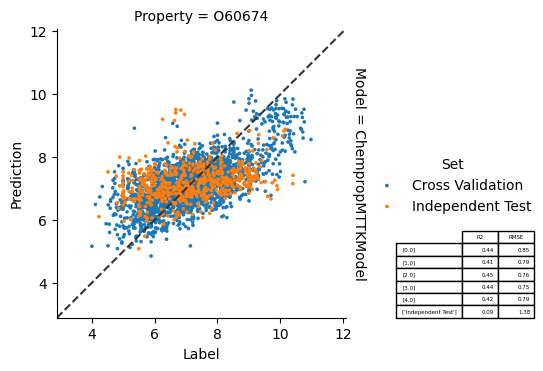

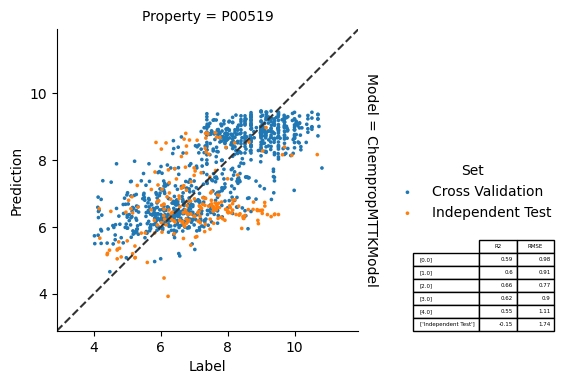

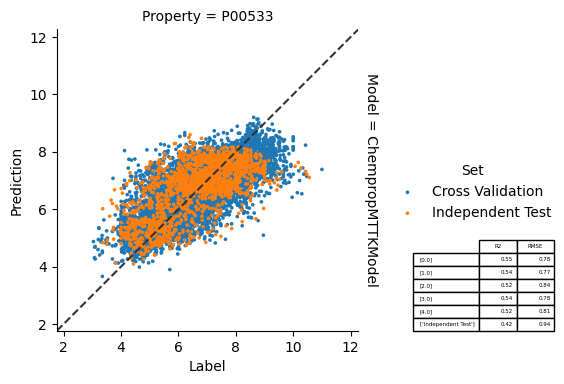

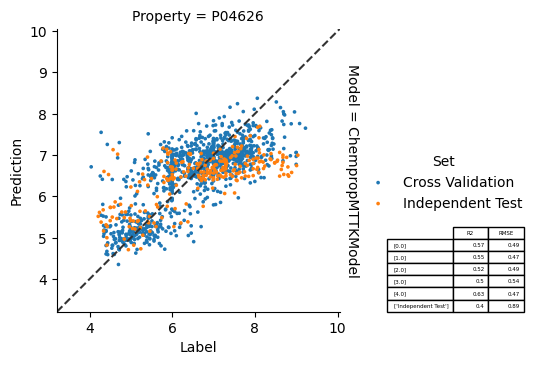

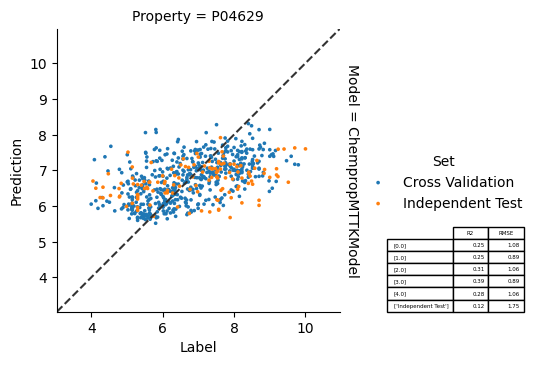

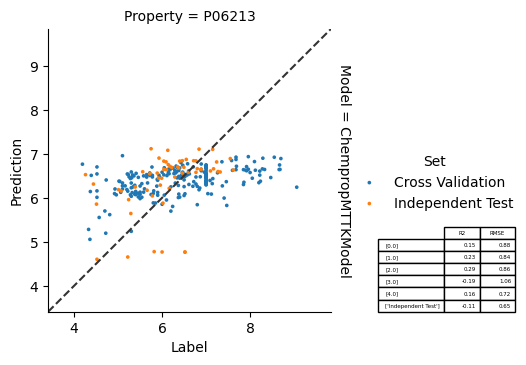

In [11]:
from plotting_regression_MT import CorrelationPlot

plot = CorrelationPlot([model])
axes, summary = plot.make(save=True, show=True, out_path='/home/s2861704/ppk/test_kin/output/TK/ChempropMT.png')

In [12]:
summary

,Model,Fold,Property,R2,RMSE,Set
0,ChempropMTTKModel,0.0,O60674,0.443897,0.851623,Cross Validation
1,ChempropMTTKModel,0.0,P00519,0.585926,0.982904,Cross Validation
2,ChempropMTTKModel,0.0,P00533,0.550217,0.784689,Cross Validation
3,ChempropMTTKModel,0.0,P04626,0.572664,0.489884,Cross Validation
4,ChempropMTTKModel,0.0,P04629,0.246033,1.081318,Cross Validation
5,ChempropMTTKModel,0.0,P06213,0.151564,0.877312,Cross Validation
6,ChempropMTTKModel,1.0,O60674,0.411084,0.785321,Cross Validation
7,ChempropMTTKModel,1.0,P00519,0.604866,0.911912,Cross Validation
8,ChempropMTTKModel,1.0,P00533,0.540526,0.768722,Cross Validation
9,ChempropMTTKModel,1.0,P04626,0.549310,0.465023,Cross Validation
